PART 1:  Basic Stats (20 marks)

1. Count the total number of tweets, describing how you deal with duplicates or other anomalies in the data set. [5 marks]
2. Plot a time-series of the number of tweets by day using the whole dataset and comment on what you see. [5 marks]
3. Use box and whisker diagrams to compare the average number of tweets on weekdays to the numbers for weekend days. Are there statistically significant differences between the number of tweets on weekdays and weekends? [5 marks]
4. Plot a time-series of the number of tweets by hour, averaged over all weekdays and comment on what you see. [5 marks]


In [2]:
import json
import zipfile
import seaborn as sns
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import time
import re

READING DATA AND ADDING TO DATAFRAME


In [6]:

dictUser = {'IDs': [], 'Created':[]}
listOfZipsNames = os.listdir('/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/')
listOfZipsNamesTest = listOfZipsNames[:10]
times = 0
for zip in listOfZipsNames:
    try:
        start_time = time.time()
        dirFinal = '/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/'+zip
        df = pd.read_json(dirFinal, convert_dates=True, compression='zip', lines=True, orient="columns")
        df.sort_index(inplace=True)
        for o in range(len(df)):
            dictUser['IDs'].append(df['id_str'][o])
            dictUser['Created'].append(df['created_at'][o])
        del df
        gc.collect()
        print(dirFinal)
        times = times + 1
    except zipfile.BadZipfile:
        continue

    print(times)
    print("--- %s seconds ---" % (time.time() - start_time))
    print('=================')

df11 = pd.DataFrame(dictUser)

/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061915.zip
1
--- 2.124782085418701 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061901.zip
2
--- 0.6357331275939941 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060410.zip
3
--- 2.2719082832336426 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022062207.zip
4
--- 1.8360309600830078 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022062213.zip
5
--- 2.0343282222747803 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060404.zip
6
--- 0.3844571113586426 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060809.zip
7
--- 2.0789270401000977 secon

In [7]:
df11=df11.drop_duplicates(subset='IDs')
df11= df11.reset_index(drop=True)

In [8]:
df11

,IDs,Created
0,1.538522e+18,2022-06-19 14:00:00+00:00
1,1.538522e+18,2022-06-19 14:00:00+00:00
2,1.538522e+18,2022-06-19 14:00:00+00:00
3,1.538522e+18,2022-06-19 14:00:00+00:00
4,1.538522e+18,2022-06-19 14:00:00+00:00
...,...,...
15027154,1.538582e+18,2022-06-19 17:59:59+00:00
15027155,1.538582e+18,2022-06-19 17:59:59+00:00
15027156,1.538582e+18,2022-06-19 17:59:59+00:00
15027157,1.538582e+18,2022-06-19 17:59:59+00:00


1. Count the total number of tweets, describing how you deal with duplicates or other anomalies in the data set. [5 marks]


In [6]:
# key = ['id_str', 'created_at']

df = createDF(['IDs', 'created_at']).drop_duplicates(subset=['id_str'])
df = df.reset_index()

print('Number of tweets:' ,len(df['id_str']))

/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061915.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061901.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060410.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022062207.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022062213.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060404.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060809.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060821.zip
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022062005.zip
/Users/miti/Documents/EXETER/Introduc

2. Plot a time-series of the number of tweets by day using the whole dataset and comment on what you see. [5 marks]

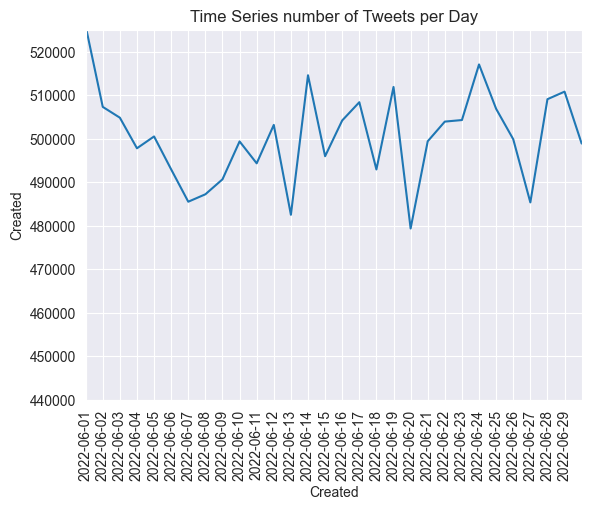

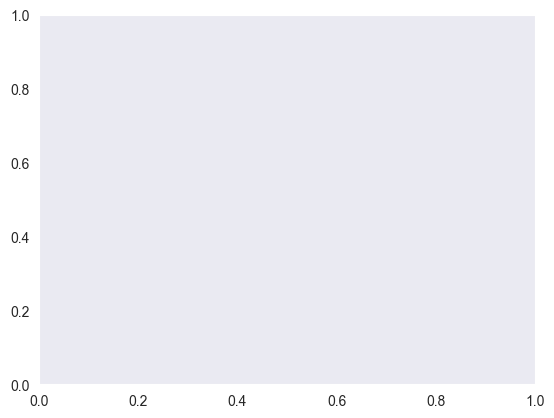

In [15]:
import datetime

import plotly as px
df2 = df11.copy()
dfWeek = df2.groupby(by=df2['Created'].dt.date).count()


fig, ax = plt.subplots()
sns.lineplot(data = dfWeek['Created'],x=dfWeek.index, y=dfWeek['Created'])
plt.xticks(rotation=90)
plt.title('Time Series number of Tweets per Day')
ax.set_ylim(440000,525000)
ax.set_xlim(19144,19173)
ax.set_xticks(range(19144,19173))


plt.show()
plt.grid()

3. Use box and whisker diagrams to compare the average number of tweets on weekdays to the numbers for weekend days. Are there statistically significant differences between the number of tweets on weekdays and weekends? [5 marks]

(445000.0, 525000.0)

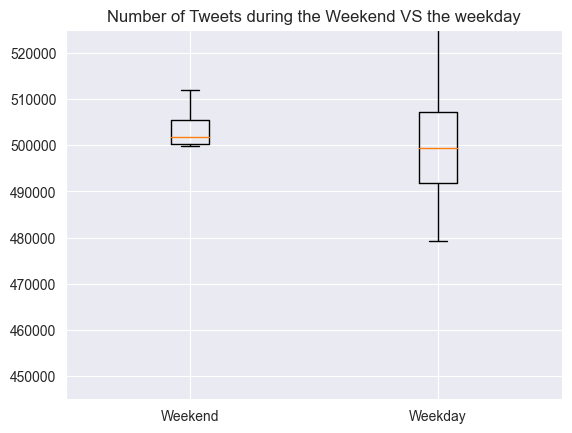

In [16]:
dfWeek2 = df2.groupby(by=df2['Created'].dt.date).count()
dfWeek2 = dfWeek2.rename_axis('date').reset_index()


weekday = []
weekend = []
for u in range(len(dfWeek2)):
    if (dfWeek2['date'][u].weekday()) <= 5:
        weekday.append(dfWeek2['Created'][u])
    else:
        weekend.append(dfWeek2['Created'][u])




dicWeek = {
  'Weekend': [],
  'Weekday': [],
}

for i in range(len(weekday)):
    dicWeek['Weekday'].append(weekday[i])

for n in range(len(weekend)):
    dicWeek['Weekend'].append(weekend[n])




fig, ax = plt.subplots()
plt.title('Number of Tweets during the Weekend VS the weekday')
ax.boxplot(dicWeek.values())
ax.set_xticklabels(dicWeek.keys())
ax.set_ylim([445000, 525000])




4. Plot a time-series of the number of tweets by hour, averaged over all weekdays and comment on what you see. [5 marks]

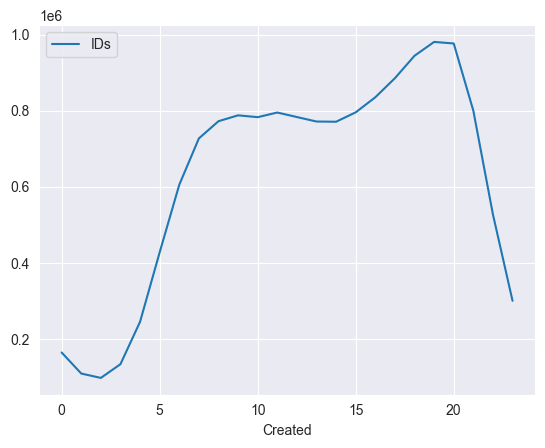

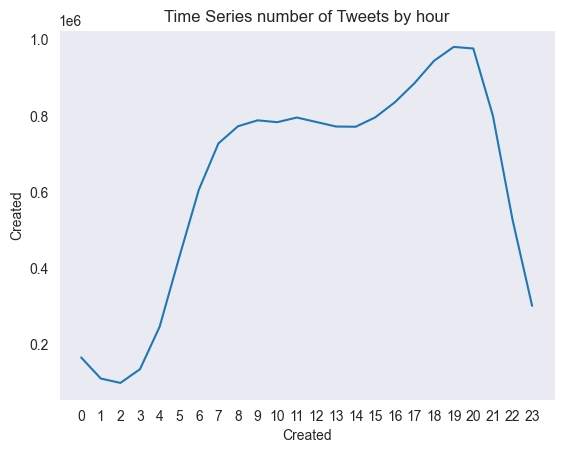

In [19]:
df3 = df11.copy()

tweetsHour = df3.groupby(by=df3['Created'].dt.hour).count()
tweetsHour.plot(y=["IDs"])

fig2, ax = plt.subplots()
sns.lineplot(data = tweetsHour['Created'],x=tweetsHour.index, y=tweetsHour['Created'])
plt.title('Time Series number of Tweets by hour')
ax.set_xticks(range(0,24))
plt.grid()
plt.show()


|PART 2:

1. Make a histogram with the number of users on the y-axis and number of tweets they make on the x-axis. Discuss the distribution that you see. All the users in the data set should be included! [5 marks]
2. Find the top-5 users by total number of tweets. Do you think any are automated accounts (aka. bots)? Justify your answer. [5 marks]
3. Find the 5 users who receive the most mentions and comment on this. [5 marks]
4. Choose 4 countries and compute how often they mention each other. This means you should compute 16 numbers e.g. UK mentions UK, UK mentions France, France mentions UK etc. Comment on any patterns you observe. [5 marks]


In [4]:
dicUser = {'tweetID': [],'userID':[]}
listOfZipsNames = os.listdir('/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/')

listOfZipsNamesTest = listOfZipsNames[:5]

times = 0

for zip in listOfZipsNames:
    try:
        start_time = time.time()
        dirFinal = '/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/'+zip
        df = pd.read_json(dirFinal, convert_dates=True, compression='zip', lines=True, orient="columns")
        df.sort_index(inplace=True)
        dfUser = pd.json_normalize(df['user'])
        for o in range(len(dfUser)):
            tweetID = df['id_str'][o]
            userID = dfUser['id_str'][o]
            dicUser['tweetID'].append(tweetID)
            dicUser['userID'].append(userID)
        del df
        del dfUser
        del tweetID
        del userID
        gc.collect()
        print(dirFinal)
        times = times + 1

    except zipfile.BadZipfile:
        continue
    print(times)
    print("--- %s seconds ---" % (time.time() - start_time))
    print('=================')

df12 = pd.DataFrame(dicUser)


/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061915.zip
1
--- 2.9454729557037354 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061901.zip
2
--- 0.7525429725646973 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060410.zip
3
--- 2.7828478813171387 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022062207.zip
4
--- 2.184448003768921 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022062213.zip
5
--- 2.442680835723877 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060404.zip
6
--- 0.44239187240600586 seconds ---
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022060809.zip
7
--- 2.4361319541931152 secon

1. Make a histogram with the number of users on the y-axis and number of tweets they make on the x-axis. Discuss the distribution that you see. All the users in the data set should be included! [5 marks]

In [5]:
df12=df12.drop_duplicates(subset='tweetID')
df12= df12.reset_index(drop=True)

In [6]:
df12

,tweetID,userID
0,1.538522e+18,1092190045
1,1.538522e+18,109968619
2,1.538522e+18,2858863684
3,1.538522e+18,123216018
4,1.538522e+18,254143342
...,...,...
15027154,1.538582e+18,1399403366783066115
15027155,1.538582e+18,518434799
15027156,1.538582e+18,9621392
15027157,1.538582e+18,90046432


In [12]:
import time
nTweets = df12.groupby(by=df12['userID']).count()
nTweets = nTweets.reset_index(level=0)
nTweetsFinal = nTweets[['tweetID','userID']].copy()

nTweetsFinal




,tweetID,userID
0,2,1000001577812463616
1,2,1000001581012672513
2,5,1000002028825993222
3,2,1000002263325335552
4,56,1000003548615266305
...,...,...
753369,3,999998219257106432
753370,3,999998758908768257
753371,1,999999071145398279
753372,19,99999912


In [13]:
nTweets2 = nTweets.groupby(by=nTweets['tweetID']).count()
nTweets2 = nTweets2.reset_index(level=0)
nTweetsFinal2 = nTweets2[['tweetID','userID']].copy()
nTweetsFinal2

,tweetID,userID
0,1,218083
1,2,101568
2,3,62892
3,4,44065
4,5,33620
...,...,...
1619,10085,1
1620,11293,1
1621,11627,1
1622,12518,1


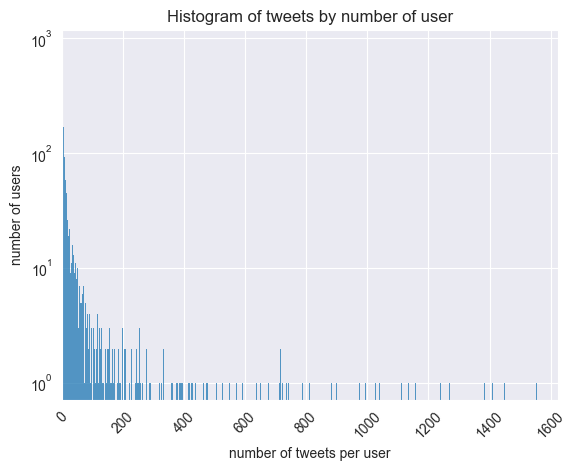

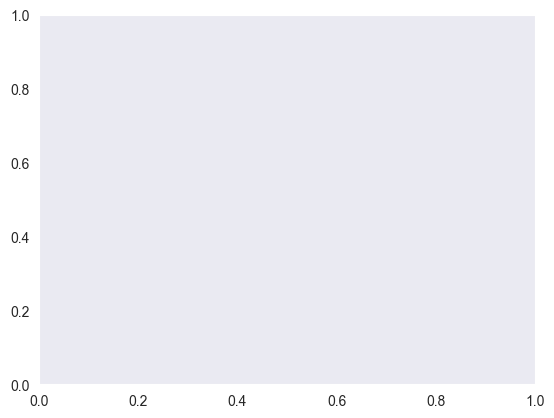

In [25]:
fig3, ax = plt.subplots()
sns.histplot(data = nTweetsFinal2['userID'], x=nTweetsFinal2['userID'],bins='auto')
plt.xticks(rotation=45)
#plt.title('Histogram of tweets by number of user')
ax.set_yscale('log')
ax.set_xlim(0,1624)
plt.xlabel("number of tweets per user")
plt.ylabel("number of users")
plt.title("Histogram of tweets by number of user")


plt.show()
plt.grid()

In [128]:

dicUser2 = {'User': [],'Tweets': 0}
listOfZipsNames = os.listdir('/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/')

listOfZipsNamesTest = listOfZipsNames[:10]

times = 0

for zip in listOfZipsNames:
    try:
        start_time = time.time()
        dirFinal = '/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/'+zip

        df = pd.read_json(dirFinal, convert_dates=True, compression='zip', lines=True, orient="columns")
        df.sort_index(inplace=True)
        for i in range(len(df)):
            tweetID = df['id_str'][i]
            dfUser = pd.json_normalize(df['user'][i])
            dfUserUser = dfUser['id_str'][i]
            if dfUserUser not in dicUser2['User']:
                dicUser2['User'].append(dfUserUser)
            elif dfUserUser in dicUser2['User']:
                dicUser2['Tweets']


        del df
        del dfUser
        del dfUserUser
        gc.collect()
        print(dirFinal)
        times = times + 1

    except zipfile.BadZipfile:
        continue
    print(times)
    print("--- %s seconds ---" % (time.time() - start_time))
    print('=================')


df = pd.DataFrame(dicUser2)


26422
26422
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061915.zip
1
--- 6.048850059509277 seconds ---
6886
6886
/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/geoEurope_2022061901.zip
2
--- 1.7829339504241943 seconds ---


KeyboardInterrupt: 

2. Find the top-5 users by total number of tweets. Do you think any are automated accounts (aka. bots)? Justify your answer. [5 marks]

In [117]:
maxTweets = df4.groupby(['id_str'], as_index=False)['statuses_count'].max()
maxTweets = maxTweets.sort_values(by=['statuses_count'], ascending=True)
maxTweets = maxTweets.reset_index()
maxTweets = maxTweets.iloc[-5:]
maxTweets2 = pd.DataFrame(maxTweets.iloc[-5:].values, columns=maxTweets.columns)
listStrings = list(maxTweets2['id_str'])


print('Users ID with the most tweets: ',listStrings)
for i in listStrings:
    for f in range(len(df4['id_str'])):
        if df4['id_str'][f] == i:
            print('User ID', i)
            print('Account Name', df4['name'][f])
            print('Number tweets',df4['statuses_count'][f] )
            print('Number followers', df4['followers_count'][f])
            print('Account Created',df4['created_at'][f])
            print('Likes',df4['favourites_count'][f])
            print('=======================')


Users ID with the most tweets:  ['7424492', '82350646', '138418838', '501150203', '88164343']
User ID 7424492
Account Name Graeme Robertson
Number tweets 1613843.0
Number followers 3112.0
Account Created Thu Jul 12 09:08:33 +0000 2007
Likes 20226.0
User ID 82350646
Account Name Márcio M. Silva
Number tweets 1762243.0
Number followers 1639.0
Account Created Wed Oct 14 12:47:43 +0000 2009
Likes 17467.0
User ID 138418838
Account Name Stigmabase | ORG
Number tweets 1828794.0
Number followers 4145.0
Account Created Thu Apr 29 13:56:48 +0000 2010
Likes 0.0
User ID 501150203
Account Name LlaneroABManchegueroCR6969X
Number tweets 1969727.0
Number followers 29297.0
Account Created Thu Feb 23 21:07:18 +0000 2012
Likes 5443.0
User ID 88164343
Account Name PropertyWala.com
Number tweets 2328097.0
Number followers 5725.0
Account Created Sat Nov 07 11:03:49 +0000 2009
Likes 0.0


3. Find the 5 users who receive the most mentions and comment on this. [5 marks]


In [17]:

dictMentions = []
listOfZipsNames = os.listdir('/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/')

listOfZipsNamesTest = listOfZipsNames[:5]
start_time = time.time()
times = 0
for zip in listOfZipsNamesTest:
    try:
        start_time2 = time.time()
        dirFinal = '/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/'+zip
        df = pd.read_json(dirFinal, convert_dates=True, compression='zip', lines=True, orient="columns")
        df.sort_index(inplace=True)

        dfMentions = pd.json_normalize(df['entities'])
        for p in range(len(dfMentions)):
            dictMentions.append(dfMentions['user_mentions'][p])

        del df
        del dfMentions
        gc.collect()
        times += 1
        print("--- %s seconds ---" % (time.time() - start_time2))
    except zipfile.BadZipfile:
        continue


print(times)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.751528024673462 seconds ---
--- 1.2312030792236328 seconds ---
--- 6.0536439418792725 seconds ---
--- 3.1930789947509766 seconds ---
--- 3.220041036605835 seconds ---
5
--- 18.450190782546997 seconds ---


In [18]:
dictMentions

[[],
 [],
 [],
 [{'id': 351458832,
   'indices': [0, 12],
   'id_str': '351458832',
   'name': 'Cristina Olivares',
   'screen_name': 'Crisoli1401'}],
 [],
 [],
 [{'id': 724378179117408256,
   'indices': [0, 8],
   'id_str': '724378179117408256',
   'name': 'Papayamad SDS 🇸🇳',
   'screen_name': 'MadChoc'}],
 [],
 [{'id': 2887906449,
   'indices': [0, 15],
   'id_str': '2887906449',
   'name': 'jambo',
   'screen_name': 'jamiethejogger'}],
 [{'id': 745239212,
   'indices': [18, 29],
   'id_str': '745239212',
   'name': 'Galway GAA',
   'screen_name': 'Galway_GAA'},
  {'id': 122789094,
   'indices': [35, 48],
   'id_str': '122789094',
   'name': 'Tipperary GAA',
   'screen_name': 'TipperaryGAA'}],
 [{'id': 520953060,
   'indices': [0, 9],
   'id_str': '520953060',
   'name': 'Lady María Gabriela',
   'screen_name': 'hitlodea'}],
 [],
 [],
 [],
 [],
 [{'id': 920829843704446976,
   'indices': [0, 12],
   'id_str': '920829843704446976',
   'name': 'Julia',
   'screen_name': 'goldenjuIia'},


In [169]:

ch = ','
listMentions = []
for i in range(len(df5["user_mentions"])):
    mentions = str(df5["user_mentions"][i]).split(ch, 1)[0]
    mentions = mentions[8:]
    listMentions.append(mentions)

from collections import Counter

text = listMentions
c = Counter()
for w in text:
    c[w] += 1

c.most_common()

[('', 169971),
 ('10228272', 404),
 ('457060718', 179),
 ('2866804900', 155),
 ('3131144855', 145),
 ('44196397', 123),
 ('68034431', 117),
 ('214930248', 106),
 ('1339166129110065152', 102),
 ('806164767635361792', 99),
 ('133663801', 93),
 ('978732571738755072', 91),
 ('20973388', 90),
 ('361409019', 89),
 ('11525172', 74),
 ('7587032', 73),
 ('612473', 73),
 ('795344738178265088', 72),
 ('150584367', 72),
 ('590346965', 72),
 ('278955879', 69),
 ('1976143068', 65),
 ('80549263', 65),
 ('13748562', 64),
 ('1336791375539527681', 63),
 ('80820758', 63),
 ('1237699450757251072', 63),
 ('1063839405977337856', 61),
 ('292535614', 58),
 ('1413513646488002565', 58),
 ('154140901', 57),
 ('1212685850095452160', 56),
 ('99620272', 55),
 ('61660254', 54),
 ('316705223', 54),
 ('1174794000693415936', 52),
 ('215411023', 51),
 ('1109573601995440129', 51),
 ('1291870856575168512', 51),
 ('14281853', 51),
 ('389644606', 50),
 ('1339298670018117632', 50),
 ('1157310179005915136', 48),
 ('499218822'

4. Choose 4 countries and compute how often they mention each other. This means you should compute 16 numbers e.g. UK mentions UK, UK mentions France, France mentions UK etc. Comment on any patterns you observe. [5 marks]


In [3]:
import time
import re

from flashtext import KeywordProcessor



start_time = time.time()
listOfZipsNames = os.listdir('TwitterJune2022')
listOfZipsNamesTest = listOfZipsNames[:10]


dictMentions = { 'Country': [],'MentionsCountry':[]}
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_list(['Spain','United Kingdom', 'France', 'Turkey'])
keyword_processor2 = KeywordProcessor()
keyword_processor2.add_keywords_from_list(['Spain','España','Espagne','Ispanya', 'France', 'Francia','Fransa', 'Turkia', 'Turkey','türkiye','Great Britain', 'United Kingdom', 'Inglaterra','Angleterre','Royaume Uni'])

times = 0
for zip in listOfZipsNamesTest:
    start_time2 = time.time()
    dirFinal = 'TwitterJune2022//'+zip
    df = pd.read_json(dirFinal, compression='zip', lines=True, orient="columns")
    for row_dict in df.to_dict(orient="records"):
        #row_dict['place']
        dictMentions['Country'].append(keyword_processor.extract_keywords(str(row_dict['place'])))
        dictMentions['MentionsCountry'].append(keyword_processor2.extract_keywords(str(row_dict['text'])))
    del df
    gc.collect()
    times += 1
    print(times)
    print("--- %s seconds ---" % (time.time() - start_time2))


#df = pd.DataFrame(dictMentions)
print("--- %s seconds ---" % (time.time() - start_time))

1
--- 5.847676992416382 seconds ---
2
--- 1.5254080295562744 seconds ---


KeyboardInterrupt: 

Part 3. Mapping (30 marks)
1. Draw a map of Europe that displays the use of Twitter across the continent. Use only the GPS-tagged tweets, these are tweets which have a “coordinates” field in the metadata. The exact form of the map is up to you: marks will be given for accuracy, clarity and presentation. [10 marks]
2. Explain any patterns you observe. [5 marks]
3. The rest of the tweets should have a “place” tag. For these tweets, plot the
CDF of the bounding box diagonals and comment. [5 marks]
4. Find one additional spatial dataset, produce a map comparing Twitter activity
with the other dataset and discuss. Your secondary dataset doesn’t have to cover the entire bounding box e.g. it could be for a single city or nation. [10 marks]

In [7]:
import ast
start_time = time.time()
times = 0
dictGPS = {'Coordinates': []}

coordPattern =  r"\-?[1-9]?[0-9]\.[0-9]+,\ \-?[1-9]?[0-9]{1,2}\.[0-9]+"
listOfZipsNames = os.listdir('/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/')
listOfZipsNamesTest = listOfZipsNames[:5]

for zip in listOfZipsNamesTest:
    try:
        times= times+1
        start_time2 = time.time()
        dirFinal = '/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/'+zip
        df = pd.read_json(dirFinal, convert_dates=True, compression='zip', lines=True, orient="columns")
        for i in range(len(df)):
            matches = str(re.findall(coordPattern, str(df['place'][i])))
            dictGPS['Coordinates'].append(matches)
        del df
        del matches
        gc.collect()
        print(times)
        print("--- %s seconds ---" % (time.time() - start_time2))
    except zipfile.BadZipfile:
        continue


dfGPS = pd.DataFrame(dictGPS)
#dfGPS.to_csv('GPS.csv')
print("--- %s seconds ---" % (time.time() - start_time))
print('=================')

SyntaxError: invalid syntax (<unknown>, line 1)

In [28]:
import csv

dfGPSCSV = pd.read_csv(r"GPS.csv", quoting=csv.QUOTE_NONNUMERIC)
dfGPSCSV = dfGPSCSV.iloc[: , 1:]
dfGPSCSV=dfGPSCSV.applymap(lambda x: x.replace("'", ''))



In [32]:
print(dfGPSCSV)
dfGPSCSV = dfGPSCSV[dfGPSCSV['Coordinates'].map(lambda d: len(d)) > 3]
dfGPSCSV = dfGPSCSV.reset_index(drop=True)
print(dfGPSCSV)

                                                Coordinates
0                                                        []
1         [2.052477, 41.317048, 2.052477, 41.468266, 2.2...
2         [8.916666, 44.450843, 8.916666, 44.507773, 9.0...
3         [0.084066, 40.055263, 0.084066, 40.128279, 0.1...
4         [-2.226804, 52.948941, -2.226804, 53.089852, -...
...                                                     ...
14798165  [-1.957296, 50.574606, -1.957296, 52.196285, 1...
14798166  [2.419185, 39.456493, 2.419185, 39.640659, 2.5...
14798167  [10.452711, 44.592162, 10.452711, 44.655977, 1...
14798168  [-1.556856, 52.870587, -1.556856, 52.960473, -...
14798169  [-2.215529, 53.374446, -2.215529, 53.454771, -...

[14798170 rows x 1 columns]
                                                Coordinates
0         [2.052477, 41.317048, 2.052477, 41.468266, 2.2...
1         [8.916666, 44.450843, 8.916666, 44.507773, 9.0...
2         [0.084066, 40.055263, 0.084066, 40.128279, 0.1...
3         [

In [33]:
dfGPSCSV.to_csv('GPS2.csv')

In [35]:
dfGPSCSV2 = pd.read_csv(r"GPS2.csv", quoting=csv.QUOTE_NONNUMERIC)
dfGPSCSV2 = dfGPSCSV2.iloc[: , 1:]
print(dfGPSCSV2)

                                                Coordinates
0         [2.052477, 41.317048, 2.052477, 41.468266, 2.2...
1         [8.916666, 44.450843, 8.916666, 44.507773, 9.0...
2         [0.084066, 40.055263, 0.084066, 40.128279, 0.1...
3         [-2.226804, 52.948941, -2.226804, 53.089852, -...
4         [-1.308995, 52.346556, -1.308995, 52.401973, -...
...                                                     ...
14791165  [-1.957296, 50.574606, -1.957296, 52.196285, 1...
14791166  [2.419185, 39.456493, 2.419185, 39.640659, 2.5...
14791167  [10.452711, 44.592162, 10.452711, 44.655977, 1...
14791168  [-1.556856, 52.870587, -1.556856, 52.960473, -...
14791169  [-2.215529, 53.374446, -2.215529, 53.454771, -...

[14791170 rows x 1 columns]


In [36]:
dfGPSCSV2.to_csv('GPSFinal.csv')

Part 4. Events (20 marks)
1. Identify 3 days with unusually high activity in 3 different countries of your choosing. For example you could choose one day in the UK, one in France and one in Turkey. Describe and justify how you identify ‘unusual’ days. [5 marks]
2. Characterise each of these three days by
a. Making a word cloud from the tweet text. [5 marks]
b. Any other method. [5 marks]
3. Summarise the events you have detected and validate your discussion with some other source of data e.g. news articles. [5 marks]


1. Identify 3 days with unusually high activity in 3 different countries of your choosing. For example you could choose one day in the UK, one in France and one in Turkey. Describe and justify how you identify ‘unusual’ days. [5 marks]


In [ ]:

start_time = time.time()
listOfZipsNames = os.listdir('/Users/miti/Documents/EXETER/Introduction Data Science/Coursework/TwitterJune2022/')
listOfZipsNamesTest = listOfZipsNames[:200]

#analyse France info an create time series
dictFrance = { 'IDFrance': [],'Time':[]}
dictTurkey = { 'IDTurkey': [],'Time':[]}
dictSpain = { 'IDSpain': [],'Time':[]}

times = 0
for zip in listOfZipsNames:
    try:
        start_time2 = time.time()
        dirFinal = 'TwitterJune2022//'+zip
        df = pd.read_json(dirFinal, compression='zip', lines=True, orient="columns", convert_dates=True)
        for row_dict in df.to_dict(orient="records"):
            #row_dict['place']
            if 'France' in str(row_dict['place']):
                dictFrance['Time'].append(row_dict['created_at'])
                dictFrance['IDFrance'].append(row_dict['id_str'])
            if 'Spain' in str(row_dict['place']) or 'España' in str(row_dict['place']):
                dictSpain['Time'].append(row_dict['created_at'])
                dictSpain['IDSpain'].append(row_dict['id_str'])
            if 'Turkey' in str(row_dict['place']) or 'Türkiye' in str(row_dict['place']):
                dictTurkey['Time'].append(row_dict['created_at'])
                dictTurkey['IDTurkey'].append(row_dict['id_str'])
    except zipfile.BadZipfile:
            continue
    del df
    gc.collect()
    times += 1
    print(times)
    print("--- %s seconds ---" % (time.time() - start_time2))



print("--- %s seconds ---" % (time.time() - start_time))
print('=================')

#Create dataframe with values
dfFrance = pd.DataFrame(dictFrance)
dfFrance = dfFrance.drop_duplicates(subset='IDFrance')
dfFrance = dfFrance.reset_index(drop=True)
#Groupby values
dfFrance['Time'] = pd.to_datetime(dfFrance['Time']).dt.date
dfFrance2 = dfFrance.groupby(by=dfFrance['Time']).count()


dfSpain = pd.DataFrame(dictSpain)
dfSpain = dfSpain.drop_duplicates(subset='IDSpain')
dfSpain = dfSpain.reset_index(drop=True)
#Groupby values
dfSpain['Time'] = pd.to_datetime(dfSpain['Time']).dt.date
dfSpain2 = dfSpain.groupby(by=dfSpain['Time']).count()


dfTurkey = pd.DataFrame(dictTurkey)
dfTurkey = dfTurkey.drop_duplicates(subset='IDTurkey')
dfTurkey = dfTurkey.reset_index(drop=True)
#Groupby values
dfTurkey['Time'] = pd.to_datetime(dfTurkey['Time']).dt.date
dfTurkey2 = dfTurkey.groupby(by=dfTurkey['Time']).count()

1
--- 4.046114921569824 seconds ---
2
--- 1.148371934890747 seconds ---
3
--- 4.183306932449341 seconds ---
4
--- 3.308199882507324 seconds ---
5
--- 4.023588180541992 seconds ---
6
--- 0.6852939128875732 seconds ---
7
--- 3.747825860977173 seconds ---
8
--- 4.855957984924316 seconds ---
9
--- 1.372786045074463 seconds ---
10
--- 3.780812978744507 seconds ---
11
--- 2.0142369270324707 seconds ---
12
--- 4.135978937149048 seconds ---
13
--- 3.762356996536255 seconds ---
14
--- 4.661357641220093 seconds ---
15
--- 4.165996789932251 seconds ---
16
--- 0.6535511016845703 seconds ---
17
--- 4.194274187088013 seconds ---
18
--- 4.2618749141693115 seconds ---
19
--- 0.7029690742492676 seconds ---
20
--- 3.863696813583374 seconds ---
21
--- 4.206074953079224 seconds ---
22
--- 1.0357139110565186 seconds ---
23
--- 4.682405710220337 seconds ---
24
--- 4.521661043167114 seconds ---
25
--- 1.6921491622924805 seconds ---
26
--- 4.4775989055633545 seconds ---
27
--- 3.9927139282226562 seconds ---
2

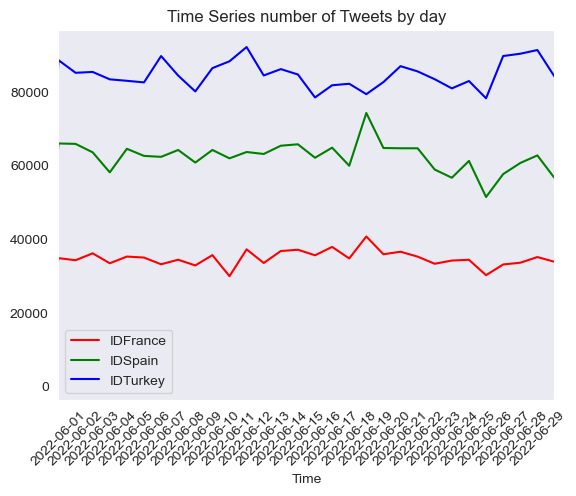

In [57]:
#plot to see the result
fig4, ax = plt.subplots()
sns.lineplot(data = dfFrance2, palette=['r'])
sns.lineplot(data = dfSpain2, palette=['g'])
sns.lineplot(data = dfTurkey2 , palette=['b'])
plt.title('Time Series number of Tweets by day')
plt.xticks(rotation=45)
ax.set_xlim(19144,19173)
ax.set_xticks(range(19144,19173))


plt.grid()
plt.show()

In [69]:
print('Maximum value of tweets France',dfFrance2['IDFrance'].max())
print('Time:',dfFrance2['IDFrance'].idxmax())

print('Maximum value of tweets Spain',dfSpain2['IDSpain'].max())
print('Time:',dfSpain2['IDSpain'].idxmax())

print('Maximum value of tweets Turkey',dfTurkey2['IDTurkey'].max())
print('Time:',dfTurkey2['IDTurkey'].idxmax())

Maximum value of tweets France 40753
Time: 19
Maximum value of tweets Spain 74279
Time: 2022-06-19
Maximum value of tweets Turkey 92175
Time: 2022-06-12


In [5]:
start_time = time.time()
listOfZipsNames = os.listdir('TwitterJune2022')
listOfZipsNamesTest = listOfZipsNames[:10]
times = 0

dictFranceText = { 'Text': []}
dictTurkeyText = { 'Text': []}
dictSpainText = { 'Text': []}

for zip in listOfZipsNames:
    try:
        start_time2 = time.time()
        dirFinal = 'TwitterJune2022//'+zip
        df = pd.read_json(dirFinal, compression='zip', lines=True, orient="columns", convert_dates=True)
        for row_dict in df.to_dict(orient="records"):
            if 'France' in str(row_dict['place']):
                if '2022-06-19' in str(row_dict['created_at']):
                    dictFranceText['Text'].append(str(row_dict['text']))
            if'Spain' in str(row_dict['place']) or 'España' in str(row_dict['place']):
                if '2022-06-19' in str(row_dict['created_at']):
                    dictSpainText['Text'].append(str(row_dict['text']))
            if 'Turkey' in str(row_dict['place']) or 'Türkiye' in str(row_dict['place']):
                if '2022-06-28' in str(row_dict['created_at']):
                    dictTurkeyText['Text'].append(str(row_dict['text']))
    except zipfile.BadZipfile:
            continue
    del df
    gc.collect()
    times += 1
    print(times)
    print("--- %s seconds ---" % (time.time() - start_time2))


#Create dataframe with values
dfFranceText = pd.DataFrame(dictFranceText)
#Create dataframe with values
dfSpainText = pd.DataFrame(dictSpainText)
#Create dataframe with values
dfTurkeyText = pd.DataFrame(dictTurkeyText)


print("--- %s seconds ---" % (time.time() - start_time))
print('=================')

1
--- 4.069941997528076 seconds ---
2
--- 1.1063170433044434 seconds ---
3
--- 3.978316068649292 seconds ---
4
--- 3.210131883621216 seconds ---
5
--- 3.7969000339508057 seconds ---
6
--- 0.6558609008789062 seconds ---
7
--- 3.8128089904785156 seconds ---
8
--- 4.839497804641724 seconds ---
9
--- 1.3082261085510254 seconds ---
10
--- 3.781604766845703 seconds ---
11
--- 1.8962180614471436 seconds ---
12
--- 4.086799144744873 seconds ---
13
--- 3.6868021488189697 seconds ---
14
--- 4.290009260177612 seconds ---
15
--- 4.023745059967041 seconds ---
16
--- 0.6011331081390381 seconds ---
17
--- 4.038594007492065 seconds ---
18
--- 4.071072101593018 seconds ---
19
--- 0.6292610168457031 seconds ---
20
--- 3.650062084197998 seconds ---
21
--- 3.9266600608825684 seconds ---
22
--- 1.0165050029754639 seconds ---
23
--- 4.392428159713745 seconds ---
24
--- 4.164208173751831 seconds ---
25
--- 1.6105239391326904 seconds ---
26
--- 4.086018085479736 seconds ---
27
--- 3.9159979820251465 seconds -

In [10]:
dfTurkeyText.to_csv('turkey.csv')

In [7]:
dfSpainText

,Text
0,No sé qué pasará en las elecciones andaluzas (...
1,@hitlodea https://t.co/uYijJZDvh6
2,"Temp:37,7°C ⇈\nTemp.Aparent:33.6°C\nHum:15% ⇊\..."
3,Fiestas Sacramentales en Molleda (Corvera) 202...
4,"15:44 Temp. 20.3°C, Hum. 65%, Dewp. 12.4°C, Ba..."
...,...
74280,@camijuanma @Garzon27dic @Wdelarosa8 @maggot13...
74281,https://t.co/O3iiB4bqdf
74282,@CommodoreSpain https://t.co/RpIMexADRn
74283,Sois 💩 @VivaLaVidaT5


2. Characterise each of these three days by
a. Making a word cloud from the tweet text. [5 marks]
b. Any other method. [5 marks]

                                                    Text
0                          @MadChoc Mdr t'es un bâtard !
1      I started 6 days 19 hours and 32 minutes ago. ...
2      @wilma_meijerink Mijn slakje in de biologische...
3      @midiminuit__ @jul @GazoMlg @Napsvraicompte @T...
4      @monicalova13 @pauline85217843 Bonne journée M...
...                                                  ...
40751  @MehdiDoncJamy @lnstantFoot Taille réelle, ça ...
40752  Lui il a du avoir 100k en chèque cadeau de la ...
40753  Quelques photos de la #PrideRadicale https://t...
40754  @BaladesR Enfin un sursaut, souhaitons qu'il s...
40755  V’la l’space mystique frère laissez le frère p...

[40756 rows x 1 columns]


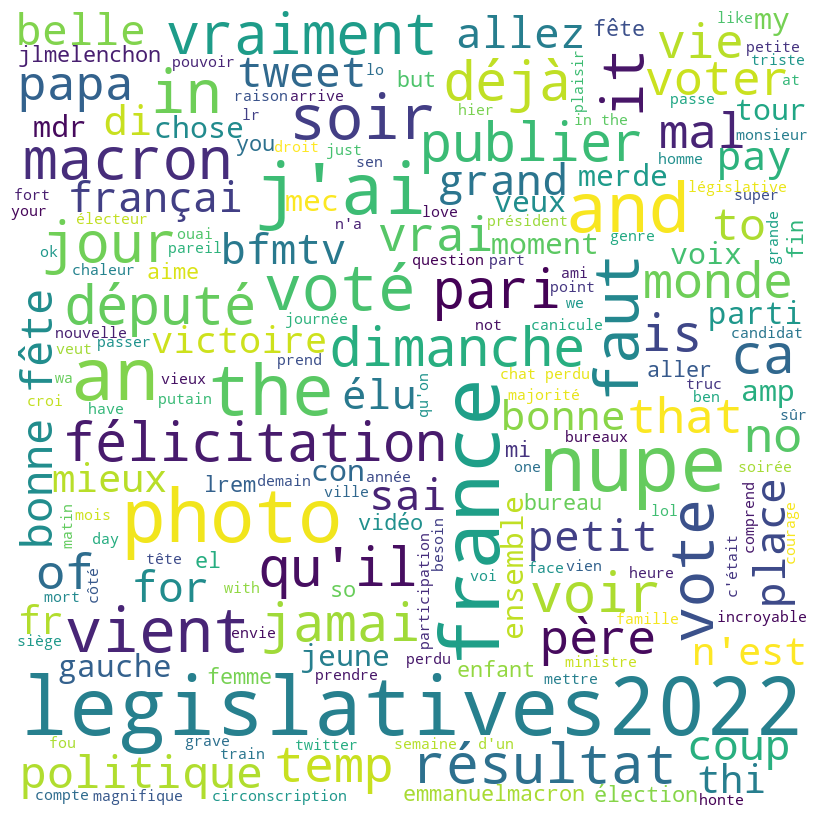

In [78]:
# Python program to generate WordCloud FRANCE

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


# opening the file in read mode
my_file = open("stopwords-fr.txt", "r")
# reading the file
data = my_file.read()
# replacing end splitting the text
# when newline ('\n') is seen.
stopwordsFR = data.split("\n")


df = pd.read_csv(r"france.csv", encoding ="utf-8")
df = df.rename(columns={'Unnamed: 0': 'Unnamed:0'})
df = df.iloc[: , 1:]
print(df)

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the df
for val in df.Text:
	# typecaste each val to string
	val = str(val)
	# split the value
	tokens = val.split()
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	comment_words += " ".join(tokens)+" "



wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwordsFR,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


                                                    Text
0      No sé qué pasará en las elecciones andaluzas (...
1                      @hitlodea https://t.co/uYijJZDvh6
2      Temp:37,7°C ⇈\nTemp.Aparent:33.6°C\nHum:15% ⇊\...
3      Fiestas Sacramentales en Molleda (Corvera) 202...
4      15:44 Temp. 20.3°C, Hum. 65%, Dewp. 12.4°C, Ba...
...                                                  ...
74280  @camijuanma @Garzon27dic @Wdelarosa8 @maggot13...
74281                            https://t.co/O3iiB4bqdf
74282            @CommodoreSpain https://t.co/RpIMexADRn
74283                               Sois 💩 @VivaLaVidaT5
74284  @yairlapid @BDYemini @KElharrar אין כמו ממשלת ...

[74285 rows x 1 columns]


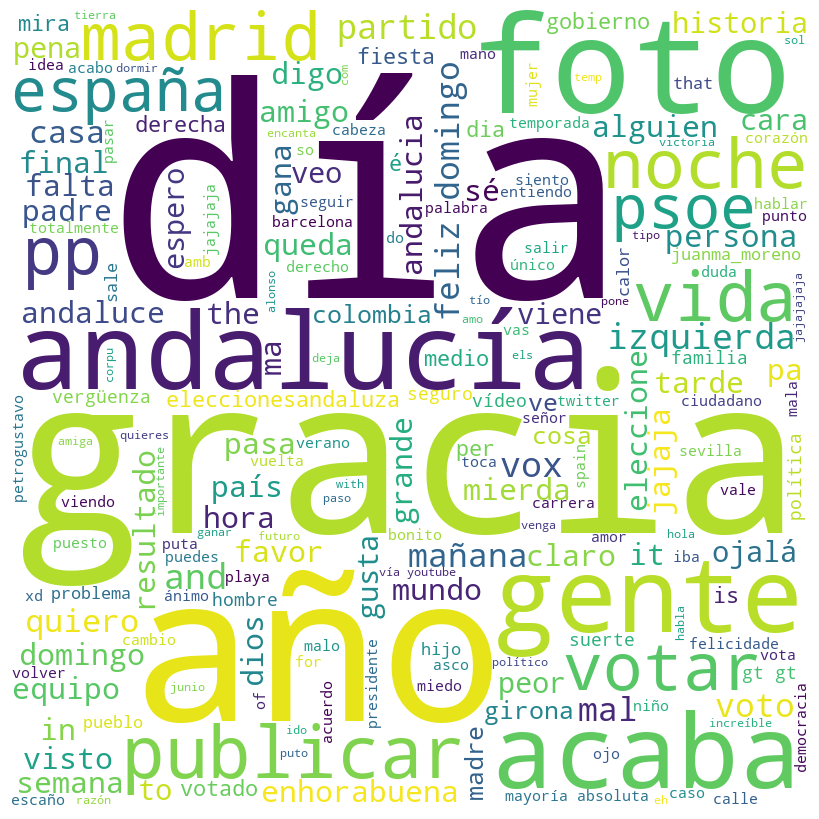

In [79]:
# Python program to generate WordCloud SPAIN


# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


# opening the file in read mode
my_file = open("spanish.txt", "r")
# reading the file
data = my_file.read()
# replacing end splitting the text
# when newline ('\n') is seen.
stopwordsES = data.split("\n")

df = pd.read_csv(r"spain.csv", encoding ="utf-8")
df = df.rename(columns={'Unnamed: 0': 'Unnamed:0'})
df = df.iloc[: , 1:]
print(df)
comment_words = ''

stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Text:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwordsES,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


                                                    Text
0                                 @lion_19_ İyi akşamlar
1                               @mandallikdeliii Peki...
2      @kabachatunBC209 @OZ_MKA_1881 Kurtuluş savaşın...
3                                   Bayıl istersen bide.
4                                https://t.co/buRCOi749t
...                                                  ...
90501                    @ATypicalOne2 good morning ☕️☕️
90502  @Vatanser5252 @mk4ndem1r @cemkucuk55 Patronun ...
90503  Er ya da geç herkes kalitesini belli ediyor hi...
90504  @KemalistFlint Yılmaz Güney çok büyük turnusol...
90505  Beni takip edip sonra takip geri çekenlere art...

[90506 rows x 1 columns]


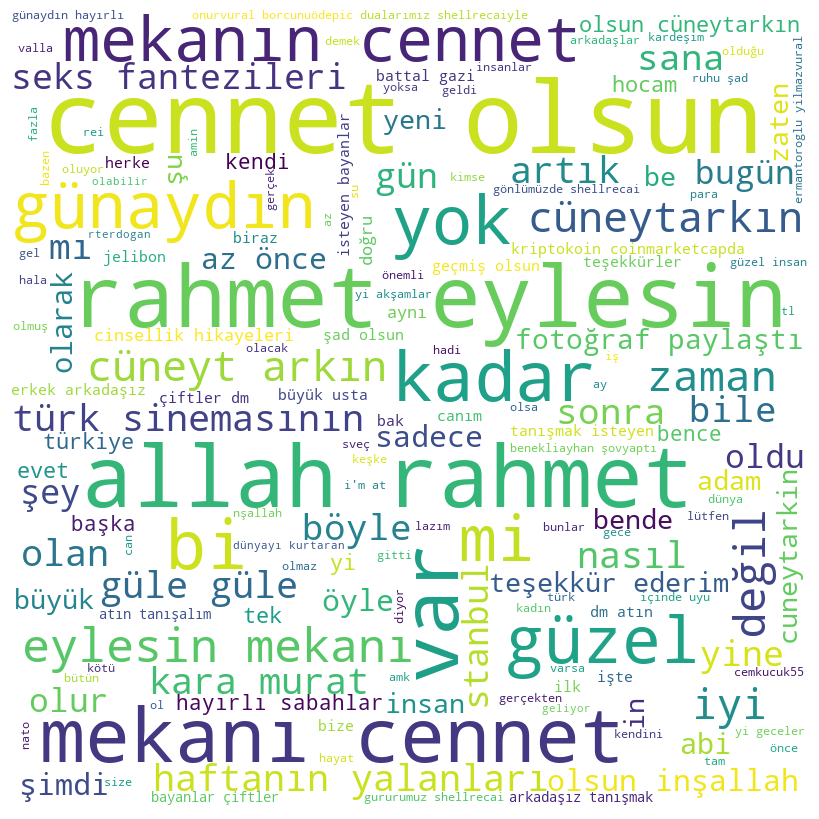

In [80]:
# Python program to generate WordCloud SPAIN


# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


# opening the file in read mode
my_file = open("turkish.txt", "r")
# reading the file
data = my_file.read()
# replacing end splitting the text
# when newline ('\n') is seen.
stopwordsES = data.split("\n")

df = pd.read_csv(r"turkey.csv", encoding ="utf-8")
df = df.rename(columns={'Unnamed: 0': 'Unnamed:0'})
df = df.iloc[: , 1:]
print(df)
comment_words = ''

stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Text:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwordsES,
				min_font_size = 10).generate(comment_words)





# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
from collections import Counter

text = comment_words
c = Counter()
for w in text:
    c[w] += 1

#c.most_common()


NOW WE USE THE MENTIONS TO TRY TO FIND THE PEOPLE MOST MENTTIONND

In [63]:
start_time = time.time()
listOfZipsNames = os.listdir('TwitterJune2022')
listOfZipsNamesTest = listOfZipsNames[:10]
times = 0

dictFranceMentions = { 'Mentions': []}
dictTurkeyMentions = { 'Mentions': []}
dictSpainMentions = { 'Mentions': []}

for zip in listOfZipsNames:
    try:
        start_time2 = time.time()
        dirFinal = 'TwitterJune2022//'+zip
        df = pd.read_json(dirFinal, compression='zip', lines=True, orient="columns", convert_dates=True)
        for row_dict in df.to_dict(orient="records"):
            if 'France' in str(row_dict['place']):
                if '2022-06-19' in str(row_dict['created_at']):
                    entitiesDF = pd.json_normalize(row_dict['entities'])
                    entitiesDF2 = pd.json_normalize(entitiesDF['user_mentions'])
                    dictFranceMentions['Mentions'].append(entitiesDF2)
            if'Spain' in str(row_dict['place']) or 'España' in str(row_dict['place']):
                if '2022-06-19' in str(row_dict['created_at']):
                    entitiesDF = pd.json_normalize(row_dict['entities'])
                    entitiesDF2 = pd.json_normalize(entitiesDF['user_mentions'])
                    dictSpainMentions['Mentions'].append(entitiesDF2)
            if 'Turkey' in str(row_dict['place']) or 'Türkiye' in str(row_dict['place']):
                if '2022-06-28' in str(row_dict['created_at']):
                    entitiesDF = pd.json_normalize(row_dict['entities'])
                    entitiesDF2 = pd.json_normalize(entitiesDF['user_mentions'])
                    dictTurkeyMentions['Mentions'].append(entitiesDF2)
    except zipfile.BadZipfile:
            continue
    del df
    gc.collect()
    times += 1
    print(times)
    print("--- %s seconds ---" % (time.time() - start_time2))


#Create dataframe with values
dfFranceMentions = pd.DataFrame(dictFranceMentions)
#Create dataframe with values
dfSpainMentions = pd.DataFrame(dictSpainMentions)
#Create dataframe with values
dfTurkeyMentions = pd.DataFrame(dictTurkeyMentions)


print("--- %s seconds ---" % (time.time() - start_time))
print('=================')

1
--- 6.322681188583374 seconds ---
2
--- 1.6785199642181396 seconds ---
3
--- 4.261041164398193 seconds ---
4
--- 3.6896159648895264 seconds ---
5
--- 4.067607879638672 seconds ---
6
--- 0.8562591075897217 seconds ---
7
--- 4.087255954742432 seconds ---
8
--- 5.352374076843262 seconds ---
9
--- 1.807978868484497 seconds ---
10
--- 4.06467604637146 seconds ---
11
--- 2.2864110469818115 seconds ---
12
--- 4.329160928726196 seconds ---
13
--- 3.979914903640747 seconds ---
14
--- 6.5519256591796875 seconds ---
15
--- 4.524687767028809 seconds ---
16
--- 0.8433401584625244 seconds ---
17
--- 4.423504114151001 seconds ---
18
--- 4.470859050750732 seconds ---
19
--- 0.8523762226104736 seconds ---
20
--- 4.056564092636108 seconds ---
21
--- 4.32421612739563 seconds ---
22
--- 1.1618638038635254 seconds ---
23
--- 4.793829917907715 seconds ---
24
--- 4.535936117172241 seconds ---
25
--- 2.068679094314575 seconds ---
26
--- 4.471796989440918 seconds ---
27
--- 4.29258918762207 seconds ---
28
--

In [64]:
dfFranceMentions.to_csv('franceMentions.csv')
dfSpainMentions.to_csv('spainMentions.csv')
dfTurkeyMentions.to_csv('turkeyMentions.csv')

In [ ]:

ch = ','
listMentions = []
for i in range(len(df5["user_mentions"])):
    mentions = str(df5["user_mentions"][i]).split(ch, 1)[0]
    mentions = mentions[8:]
    listMentions.append(mentions)

from collections import Counter

text = listMentions
c = Counter()
for w in text:
    c[w] += 1

c.most_common()

In [59]:
coordPattern =  r"'id': (?:[0-9]\d|50)"
matches = str(re.findall(coordPattern, str(dfSpainMentions['Mentions'][0])))
print(matches)

NameError: name 'dfSpainMentions' is not defined

In [75]:
dfSpainMentionsCSV = pd.read_csv(r"spainMentions.csv", encoding ="latin-1")
dfFranceMentionsCSV = pd.read_csv(r"franceMentions.csv", encoding ="latin-1")
dfTurkeyMentionsCSV = pd.read_csv(r"turkeyMentions.csv", encoding ="latin-1")


In [74]:
#MENTIONS IN SPAIN
listMentionsSpain = []
coordPattern =  r"(?:[0-9][0-9][0-9][0-9]?[0-9]?[0-9]?[0-9]?[0-9]?[0-9]?[0-9]?\d)"
for p in range(len(dfSpainMentionsCSV)):
    matches = str(re.findall(coordPattern, str(dfSpainMentionsCSV['Mentions'][p])))
    listMentionsSpain.append(matches)

from collections import Counter

text = listMentionsSpain
c = Counter()
for w in text:
    c[w] += 1

c.most_common()

[('[]', 31291),
 ("['278955879']", 162),
 ("['10228272']", 100),
 ("['49849732']", 84),
 ("['11095736019', '95440129']", 81),
 ("['85487410272', '8929284', '14839446936', '91998210', '14806707505', '49884930']",
  75),
 ("['1147824680']", 69),
 ("['28297965']", 65),
 ("['50982086', '200194757']", 63),
 ("['14077479244', '57558016']", 61),
 ("['278955879', '149064381']", 53),
 ("['483050252']", 49),
 ("['198141246']", 48),
 ("['507672047']", 47),
 ("['301308940']", 47),
 ("['150584367']", 47),
 ("['2201623465']", 45),
 ("['14299404375', '82852097']", 44),
 ("['2904896141']", 43),
 ("['784574954']", 43),
 ("['351458832']", 42),
 ("['91354736500', '0339456']", 41),
 ("['14845580580', '59665416']", 40),
 ("['7996082']", 37),
 ("['85487410272', '8929284', '15027921528', '36886529', '14839446936', '91998210', '14806707505', '49884930']",
  37),
 ("['14436030']", 36),
 ("['625552603']", 36),
 ("['98180428147', '1881221']", 36),
 ("['58761547']", 35),
 ("['121385551']", 35),
 ("['4906200274', 

In [76]:
#MENTIONS IN FRANCE
listMentionsFrance = []
coordPattern =  r"(?:[0-9][0-9][0-9][0-9]?[0-9]?[0-9]?[0-9]?[0-9]?[0-9]?[0-9]?\d)"
for p in range(len(dfFranceMentionsCSV)):
    matches = str(re.findall(coordPattern, str(dfFranceMentionsCSV['Mentions'][p])))
    listMentionsFrance.append(matches)

from collections import Counter

text = listMentionsFrance
c = Counter()
for w in text:
    c[w] += 1

c.most_common()

[('[]', 17561),
 ("['133663801']", 103),
 ("['80820758']", 66),
 ("['14827498674', '20262411']", 59),
 ("['1976143068']", 55),
 ("['93434976482', '8811265']", 50),
 ("['89375885429', '4589440']", 39),
 ("['13737429029', '84212489']", 36),
 ("['60927960']", 34),
 ("['10228272']", 34),
 ("['125727024']", 30),
 ("['12591969613', '13435649']", 29),
 ("['44196397']", 28),
 ("['14331601085', '82842369']", 25),
 ("['491343921']", 25),
 ("['79377857502', '3476736', '13838777223', '55560453']", 23),
 ("['11006401622', '98490880', '80762944']", 23),
 ("['80043576496', '6215680']", 22),
 ("['18396319']", 22),
 ("['87886754']", 22),
 ("['1725137533']", 20),
 ("['12507765394', '21081606']", 20),
 ("['57652561']", 20),
 ("['15229278384', '20213761']", 20),
 ("['1567849861']", 20),
 ("['26073581']", 20),
 ("['1122434923']", 19),
 ("['38142665']", 19),
 ("['80045292992', '4657152']", 18),
 ("['472412809']", 18),
 ("['313264829']", 18),
 ("['338955445']", 18),
 ("['371381075']", 17),
 ("['14625489773',

In [77]:
#MENTIONS IN TURKEY
listMentionsTurkey = []
coordPattern =  r"(?:[0-9][0-9][0-9][0-9]?[0-9]?[0-9]?[0-9]?[0-9]?[0-9]?[0-9]?\d)"
for p in range(len(dfTurkeyMentionsCSV)):
    matches = str(re.findall(coordPattern, str(dfTurkeyMentionsCSV['Mentions'][p])))
    listMentionsTurkey.append(matches)

from collections import Counter

text = listMentionsTurkey
c = Counter()
for w in text:
    c[w] += 1

c.most_common()

[('[]', 48898),
 ("['79594037887', '6710912']", 385),
 ("['68034431']", 216),
 ("['70025554']", 196),
 ("['11722685307', '85562630']", 144),
 ("['837588744']", 126),
 ("['2866804900']", 124),
 ("['2866804900', '13268128372', '52112384']", 96),
 ("['276799677']", 93),
 ("['80616476763', '5361792']", 87),
 ("['361409019']", 76),
 ("['10228272']", 74),
 ("['12126858500', '95452160']", 73),
 ("['582063133']", 73),
 ("['79534473817', '8265088']", 68),
 ("['194915782']", 68),
 ("['98149527']", 67),
 ("['109992881']", 67),
 ("['14440041578', '24897024']", 64),
 ("['11525172']", 64),
 ("['509003042']", 63),
 ("['462921513']", 59),
 ("['11747940006', '93415936']", 58),
 ("['99620272']", 57),
 ("['1252700197']", 55),
 ("['236131165']", 52),
 ("['366128428']", 51),
 ("['292535614']", 49),
 ("['422861505']", 43),
 ("['3073861855']", 42),
 ("['161355169']", 42),
 ("['2463146694']", 38),
 ("['259758878']", 37),
 ("['12051114950', '27240961']", 36),
 ("['137957360']", 35),
 ("['154140901']", 35),
 ("

In [ ]:
import rasterio

tif_file = rasterio.open('../../HumanImpact/population/data/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0.tif')
ghs_data = tif_file.read()